In [571]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [572]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [573]:
file_name

'D:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/CATASTRO/shp_inst_40.shp'

In [574]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

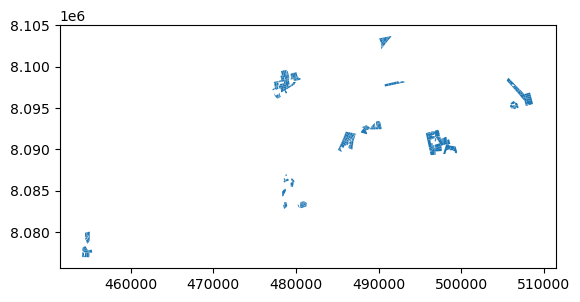

In [575]:
data.plot()
plt.show()

In [576]:
data.head(3)

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,cod,geometry
0,296.0,LOMAS_DE_BIBOSI--CIRBIAN,2536.0,CIRBIAN_HURTADO_ROBERT,L1,RENOVACION,None,FY,None,122,renovacion,40,14.47,a,"POLYGON Z ((479075.459 8097806.402 0.000, 4788..."
1,296.0,LOMAS_DE_BIBOSI--CIRBIAN,2536.0,CIRBIAN_HURTADO_ROBERT,L2,RENOVACION,None,FA,None,122,renovacion,40,8.36,a,"POLYGON Z ((478972.235 8098308.977 0.000, 4791..."
2,296.0,LOMAS_DE_BIBOSI--CIRBIAN,2536.0,CIRBIAN_HURTADO_ROBERT,L3,RENOVACION,None,Y,None,122,renovacion,40,6.05,a,"POLYGON Z ((479076.362 8097802.174 0.000, 4791..."


In [577]:
data.crs.name

'WGS 84 / UTM zone 20S'

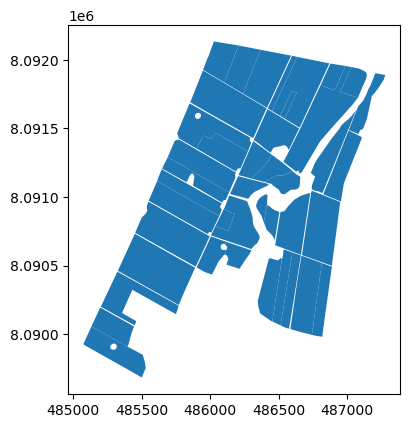

In [578]:
propiedad = data[data['unidad_01']==495]
propiedad.plot()
plt.show()

In [579]:
def quitar_caracteres(text):
    text = text.replace('_', ' ')
    text = text.replace('"', '')
    text = text.replace('.', '')
    return text

In [580]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'unidad_01':'int',
    'unidad_03':'int'
})

In [581]:
propiedad.head(3)

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,cod,geometry
46,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L8.2,UCG_90-20,2019-04-15,FA,None,3,canha,40,5.02,a,"POLYGON Z ((486239.045 8091752.826 0.000, 4861..."
47,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L8.1,UCG_90-20,2021-05-03,FY,IAG,1,canha,40,4.53,a,"POLYGON Z ((486102.299 8091834.371 0.000, 4859..."
48,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L20.1,UCG_90-20,2021-04-28,FA,IAG,1,canha,40,3.37,a,"POLYGON Z ((486447.739 8091308.337 0.000, 4864..."


In [582]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']
file_name

'495_LAS_MARAS--HUGO_SERRATE'

In [583]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,soca,cultivo,zona,area,cod,geometry
46,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L8.2,UCG_90-20,2019-04-15,FA,None,3,canha,40,5.02,a,"POLYGON Z ((486239.045 8091752.826 0.000, 4861..."
47,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L8.1,UCG_90-20,2021-05-03,FY,IAG,1,canha,40,4.53,a,"POLYGON Z ((486102.299 8091834.371 0.000, 4859..."
48,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L20.1,UCG_90-20,2021-04-28,FA,IAG,1,canha,40,3.37,a,"POLYGON Z ((486447.739 8091308.337 0.000, 4864..."
49,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L19.1,UCG_90-20,2019-05-16,FA,None,3,canha,40,5.45,a,"POLYGON Z ((486043.955 8091463.494 0.000, 4860..."
50,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L6,UCG_90-20,2021-05-04,FY,IAG,1,canha,40,12.97,a,"POLYGON Z ((486411.182 8091646.147 0.000, 4863..."


In [584]:
num_columnas = len(propiedad.columns)
num_columnas

15

In [585]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [586]:
propiedad.head(3)

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,soca,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
46,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L8.2,UCG_90-20,2019-04-15,FA,None,3,...,5.02,UCG_90-20,2019-04-15,3,,0,12478,495,a,0
47,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L8.1,UCG_90-20,2021-05-03,FY,IAG,1,...,4.53,UCG_90-20,2021-05-03,1,,0,12478,495,a,0
48,495,LAS_MARAS--HUGO_SERRATE,12478,SERRATE_COLAMARINO_HUGO,L20.1,UCG_90-20,2021-04-28,FA,IAG,1,...,3.37,UCG_90-20,2021-04-28,1,,0,12478,495,a,0


In [587]:
propiedad.columns

Index(['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'var',
       'fs', 'tex', 'financia', 'soca', 'cultivo', 'zona', 'area', 'cod',
       'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [588]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [589]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
46,"POLYGON Z ((486239.045 8091752.826 0.000, 4861...",L8.2,FA,5.02,UCG_90-20,2019-04-15,3,,0,12478,495,a,0
47,"POLYGON Z ((486102.299 8091834.371 0.000, 4859...",L8.1,FY,4.53,UCG_90-20,2021-05-03,1,,0,12478,495,a,0
48,"POLYGON Z ((486447.739 8091308.337 0.000, 4864...",L20.1,FA,3.37,UCG_90-20,2021-04-28,1,,0,12478,495,a,0
49,"POLYGON Z ((486043.955 8091463.494 0.000, 4860...",L19.1,FA,5.45,UCG_90-20,2019-05-16,3,,0,12478,495,a,0
50,"POLYGON Z ((486411.182 8091646.147 0.000, 4863...",L6,FY,12.97,UCG_90-20,2021-05-04,1,,0,12478,495,a,0


In [590]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        else:
            return 'SOCA'
    except Exception as ex:
        return 'RENOVACION'

In [591]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [592]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [593]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
46,"POLYGON Z ((486239.045 8091752.826 0.000, 4861...",L8.2,FA,5.02,UCG_90-20,20190415,3,SOCA,0,12478,495,a,0
47,"POLYGON Z ((486102.299 8091834.371 0.000, 4859...",L8.1,FY,4.53,UCG_90-20,20210503,1,SOCA,0,12478,495,a,0
48,"POLYGON Z ((486447.739 8091308.337 0.000, 4864...",L20.1,FA,3.37,UCG_90-20,20210428,1,SOCA,0,12478,495,a,0
49,"POLYGON Z ((486043.955 8091463.494 0.000, 4860...",L19.1,FA,5.45,UCG_90-20,20190516,3,SOCA,0,12478,495,a,0
50,"POLYGON Z ((486411.182 8091646.147 0.000, 4863...",L6,FY,12.97,UCG_90-20,20210504,1,SOCA,0,12478,495,a,0


In [594]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [595]:
tchs = pd.read_excel(fp_tch)

In [596]:
tchs.head(3)

,COD_AVANCE,CODIGO CAÑERO,INS,NOMBRE CAÑERO,DESSIG,CREA,COMPROMISO GRUPAL,COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,...,TN ENTREGADAS INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2022,RENDIMIENTO 2021,ESTIMATIVA RENDIMIENTO 2022,OBSERVACIONES,Unnamed: 20
0,131_1,2224,NaN,CRUZ VARGAS WILLY WALDO,NaN,NaN,7067.07,0.00,NaN,NaN,...,42.86,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,81_36,41555,81.0,FRANCO GUZMAN CARLA DANIELA,NaN,NaN,7053.98,7053.98,0.0,0.0,...,7138.06,1.011920,0.0,0.0,NaN,NaN,0.000000,59.896088,SIN CATASTRO,NaN
2,50_29,15501,50.0,WENDE RIOJA MAURICIO,NaN,NaN,4525.38,4525.38,0.0,0.0,...,3537.96,0.781804,0.0,0.0,NaN,NaN,39.153575,0.000000,SIN CATASTRO,NaN


In [597]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [598]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'RENDIMIENT':'float',
    'COD_CA':'int',
    'COD_PROP':'int'
})

In [599]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
46,"POLYGON Z ((486239.045 8091752.826 0.000, 4861...",L8.2,FA,5.02,UCG_90-20,20190415,3,SOCA,79.554011,12478,495,a,0
47,"POLYGON Z ((486102.299 8091834.371 0.000, 4859...",L8.1,FY,4.53,UCG_90-20,20210503,1,SOCA,79.554011,12478,495,a,0
48,"POLYGON Z ((486447.739 8091308.337 0.000, 4864...",L20.1,FA,3.37,UCG_90-20,20210428,1,SOCA,79.554011,12478,495,a,0


In [600]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [601]:
bloques = pd.read_excel(fp_bloques)

In [602]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [603]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [604]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
46,"POLYGON Z ((486239.045 8091752.826 0.000, 4861...",L8.2,FA,5.02,UCG_90-20,20190415,3,SOCA,79.554011,12478,495,a,359
47,"POLYGON Z ((486102.299 8091834.371 0.000, 4859...",L8.1,FY,4.53,UCG_90-20,20210503,1,SOCA,79.554011,12478,495,a,359
48,"POLYGON Z ((486447.739 8091308.337 0.000, 4864...",L20.1,FA,3.37,UCG_90-20,20210428,1,SOCA,79.554011,12478,495,a,359


In [605]:
propiedad['ID'] = propiedad.apply(lambda x : '0000' + str(x['COD_PROP']) + '0000' + x['NOM_LOTE'], axis=1)

In [606]:
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
46,"POLYGON Z ((486239.045 8091752.826 0.000, 4861...",L8.2,FA,5.02,UCG_90-20,20190415,3,SOCA,79.554011,12478,495,00004950000L8.2,359
47,"POLYGON Z ((486102.299 8091834.371 0.000, 4859...",L8.1,FY,4.53,UCG_90-20,20210503,1,SOCA,79.554011,12478,495,00004950000L8.1,359
48,"POLYGON Z ((486447.739 8091308.337 0.000, 4864...",L20.1,FA,3.37,UCG_90-20,20210428,1,SOCA,79.554011,12478,495,00004950000L20.1,359


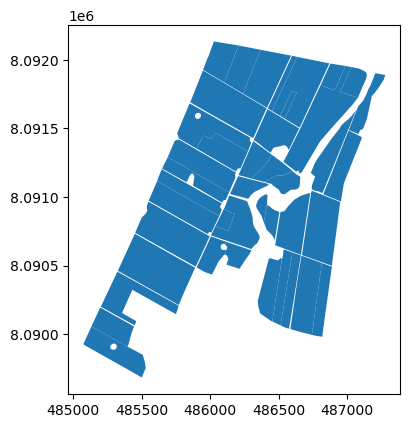

In [607]:
propiedad.plot()
plt.show()

In [608]:
#quitar_caracteres
propiedad['VARIEDAD'] = propiedad['VARIEDAD'].apply(quitar_caracteres)

In [620]:
propiedad

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
46,"POLYGON Z ((-63.12946 -17.25932 0.00000, -63.1...",L8.2,FA,5.02,UCG 90-20,20190415,3,SOCA,79.554011,12478,495,00004950000L8.2,359
47,"POLYGON Z ((-63.13074 -17.25858 0.00000, -63.1...",L8.1,FY,4.53,UCG 90-20,20210503,1,SOCA,79.554011,12478,495,00004950000L8.1,359
48,"POLYGON Z ((-63.12750 -17.26334 0.00000, -63.1...",L20.1,FA,3.37,UCG 90-20,20210428,1,SOCA,79.554011,12478,495,00004950000L20.1,359
49,"POLYGON Z ((-63.13130 -17.26193 0.00000, -63.1...",L19.1,FA,5.45,UCG 90-20,20190516,3,SOCA,79.554011,12478,495,00004950000L19.1,359
50,"POLYGON Z ((-63.12784 -17.26028 0.00000, -63.1...",L6,FY,12.97,UCG 90-20,20210504,1,SOCA,79.554011,12478,495,00004950000L6,359
51,"POLYGON Z ((-63.13271 -17.27072 0.00000, -63.1...",L13,FA,12.33,UCG 90-20,20210509,1,SOCA,79.554011,12478,495,00004950000L13,359
52,"POLYGON Z ((-63.12281 -17.25921 0.00000, -63.1...",L9.3,FA,2.66,UCG 90-20,20190521,3,SOCA,79.554011,12478,495,00004950000L9.3,359
53,"POLYGON Z ((-63.12616 -17.25681 0.00000, -63.1...",L8.3,FA,8.07,UCG 90-20,20210502,1,SOCA,79.554011,12478,495,00004950000L8.3,359
54,"POLYGON Z ((-63.12401 -17.26588 0.00000, -63.1...",L5.2,FY,5.62,UCG 90-20,20210419,1,SOCA,79.554011,12478,495,00004950000L5.2,359
55,"POLYGON Z ((-63.12561 -17.26161 0.00000, -63.1...",L7,FY,5.92,CITTCA 85-22,20210429,1,SOCA,79.554011,12478,495,00004950000L7,359


In [609]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
46,"POLYGON Z ((486239.045 8091752.826 0.000, 4861...",L8.2,FA,5.02,UCG 90-20,20190415,3,SOCA,79.554011,12478,495,00004950000L8.2,359
47,"POLYGON Z ((486102.299 8091834.371 0.000, 4859...",L8.1,FY,4.53,UCG 90-20,20210503,1,SOCA,79.554011,12478,495,00004950000L8.1,359
48,"POLYGON Z ((486447.739 8091308.337 0.000, 4864...",L20.1,FA,3.37,UCG 90-20,20210428,1,SOCA,79.554011,12478,495,00004950000L20.1,359
49,"POLYGON Z ((486043.955 8091463.494 0.000, 4860...",L19.1,FA,5.45,UCG 90-20,20190516,3,SOCA,79.554011,12478,495,00004950000L19.1,359
50,"POLYGON Z ((486411.182 8091646.147 0.000, 4863...",L6,FY,12.97,UCG 90-20,20210504,1,SOCA,79.554011,12478,495,00004950000L6,359


In [610]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [611]:
propiedad = propiedad.to_crs(epsg=4326)

In [612]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [613]:
propiedad['SUPERFICIE'].sum()

235.31000000000003

In [614]:
file_name + '.geojson'

'495_LAS_MARAS--HUGO_SERRATE.geojson'

In [615]:
#file_name='d'

In [616]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\PROPIEDADES_OFFICIALES")

In [617]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [618]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\PROPIEDADES_OFFICIALES\\495_LAS_MARAS--HUGO_SERRATE.geojson'

In [619]:
propiedad.to_file(out_dir, driver='GeoJSON')